# Modelling from Benchmark Stats and Open Performance

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/var/folders/0p/vxx15thx5pv6_xnkf32xgpzr0000gn/T/ipykernel_47783/3338272293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read in DataFrame

In [124]:
# dataset downloaded from https://github.com/captamericadevs/CFOpenData/blob/master/DataProcess/Profiles/Profile_Men.csv
profiles = pd.read_csv("../../../datasets/Profile_Men.csv", encoding_errors="ignore")
profiles.rename({'Unnamed: 0': 'Userid'},axis = 1,  inplace=True)
profiles.head()

/var/folders/0p/vxx15thx5pv6_xnkf32xgpzr0000gn/T/ipykernel_46688/235435061.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  profiles = pd.read_csv("../../../datasets/Profile_Men.csv", encoding_errors="ignore")


,Userid,Name,Affiliate,Region,Age,Height,Weight,Back Squat,Clean & Jerk,Snatch,Deadlift,Fight Gone Bad,Max Pull-ups,Fran,Grace,Helen,Filthy 50,Sprint 400m,Run 5K
0,86,Justin Bergh,Container CrossFit,Northern California,34,77,231,335,265,210,415,393,32,3:46,2:54,8:16,21:27,1:04,22:05
1,88,Cary Hair,CrossFit Santa Cruz,Northern California,32,72,191,455,315,265,518,407,54,2:20,1:49,7:28,18:23,0:54,21:34
2,92,Tim Chan,CrossFit DCS,Southern California,47,66,150,0,0,0,0,0,0,4:22,0,0,0,0,0
3,93,Leif Edmundson,CrossFit Santa Cruz,Northern California,34,72,210,305,235,185,355,403,45,3:40,2:34,8:13,25:00,1:02,20:39
4,1616,Russ Greene,CrossFit DC,Mid Atlantic,30,70,180,0,0,0,485,0,52,3:05,0,0,0,0,19:20


In [ ]:
# dataset downloaded from: https://github.com/captamericadevs/CFOpenData/blob/master/AffiliateAnalysis/Data/Men_Rx_2017.csv
open = pd.read_csv("../../../datasets/Men_Rx_2017.csv", encoding_errors="ignore")
open.head()

/var/folders/0p/vxx15thx5pv6_xnkf32xgpzr0000gn/T/ipykernel_46688/2282833696.py:1: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  open = pd.read_csv("../../../datasets/Men_Rx_2017.csv", encoding_errors="ignore")


,Unnamed: 0,Userid,Name,Height (m),Weight (kg),Age,Regionid,Regionname,Affiliateid,Overallrank,...,17.3_score,17.3_percentile,17.3_predicted_reps,17.4_rank,17.4_score,17.4_percentile,17.5_rank,17.5_score,17.5_percentile,17.5_predicted_time
0,0,153604,Mathew Fraser,1.70,NaN,27,11,North East,2080,1,...,0 days 00:17:47,99.9984,292.0,1,327.0,100.0000,1,0 days 00:06:24,100.0000,0 days 00:06:24.000000000
1,1,2725,Noah Ohlsen,1.70,NaN,26,15,South East,2509,2,...,0 days 00:19:28,99.9860,266.0,33,303.0,99.9757,11,0 days 00:06:38,99.9912,0 days 00:06:38.000000000
2,2,180541,Alex Vigneault,1.80,NaN,25,4,Canada East,10990,3,...,0 days 00:18:35,99.9961,279.0,5,320.0,99.9970,41,0 days 00:06:54,99.9647,0 days 00:06:54.000000000
3,3,81616,Björgvin Karl Guðmundsson,1.78,NaN,24,7,Europe,4860,4,...,0 days 00:19:03,99.9907,272.0,30,304.0,99.9787,68,0 days 00:07:00,99.9408,0 days 00:07:00.000000000
4,4,388740,Anthony Davis,1.75,NaN,22,10,North Central,1289,5,...,0 days 00:19:48,99.9798,262.0,51,300.0,99.9635,17,0 days 00:06:41,99.9859,0 days 00:06:41.000000000


In [126]:
# ignore columns we aren't interested in
open = open[['Userid','Overallrank',
        '17.1_rank', '17.1_score', '17.1_percentile', '17.2_score', '17.2_percentile',
       '17.3_rank', '17.3_score', '17.3_percentile',
       '17.4_rank', '17.4_score', '17.4_percentile', '17.5_rank', '17.5_score',
       '17.5_percentile']]

In [127]:
# join the two tables.
merged = pd.merge(left = profiles, right = open, how = 'left', on = ['Userid'])
merged.head()

,Userid,Name,Affiliate,Region,Age,Height,Weight,Back Squat,Clean & Jerk,Snatch,...,17.2_percentile,17.3_rank,17.3_score,17.3_percentile,17.4_rank,17.4_score,17.4_percentile,17.5_rank,17.5_score,17.5_percentile
0,86,Justin Bergh,Container CrossFit,Northern California,34,77,231,335,265,210,...,56.3735,66988.0,56,48.9657,45858.0,178.0,65.3368,37463.0,0 days 00:15:20,66.9084
1,88,Cary Hair,CrossFit Santa Cruz,Northern California,32,72,191,455,315,265,...,44.5324,104729.0,43,25.6382,7209.0,212.0,94.5979,3078.0,0 days 00:09:13,97.2820
2,92,Tim Chan,CrossFit DCS,Southern California,47,66,150,0,0,0,...,49.7887,77146.0,48,39.9316,127112.0,87.0,3.4707,90187.0,0 days 00:27:38,20.3406
3,93,Leif Edmundson,CrossFit Santa Cruz,Northern California,34,72,210,305,235,185,...,65.0771,32748.0,80,77.9264,54564.0,175.0,59.6801,148472.0,NaN,NaN
4,1616,Russ Greene,CrossFit DC,Mid Atlantic,30,70,180,0,0,0,...,96.3512,16736.0,93,87.7128,10264.0,205.0,92.2380,7768.0,0 days 00:10:32,93.1391


## Preprocessing

In [160]:
# convert any columns to datetime as needed
def convert_to_datetime(col_name, df):
    if df[col_name].dtype == 'O':
        # replace str nan to np.NaN
        dt_col = df[col_name]
        dt_col = dt_col.replace('nan', np.NaN)

        dt_col = pd.to_timedelta(dt_col)
        return dt_col
    return df[col_name]

for col in ['17.1_score','17.5_score']:
    merged[col] = convert_to_datetime(col, merged)

## Workout 17.3
https://games.crossfit.com/workouts/open/2017/3?division=1
It was a gatekeep type of workout, where most people would complete for reps. Only athletes who finished the whole thing would get s timed workout. We would need to convert this to a consistent format

In [129]:
def fill_time_with_reps(x, value = 0):
    if x == np.NaN:
        return 0
    if type(x) == str and 'day' in x:
        return value
    return x


In [130]:
# if it contains a time, they did the whole workout
merged['17.3_reps'] = merged['17.3_score'].fillna(0)
merged['17.3_reps'] = merged['17.3_reps'].apply(fill_time_with_reps, value = 216)
merged['17.3_reps'] = merged['17.3_reps'].astype('int')

## Workout 17.5
https://games.crossfit.com/workouts/open/2017/5?division=1
This workout was a timed workout, where the goal was to complete the workout as fast as possible. There was no timecap, so hoping its all in a consistent format

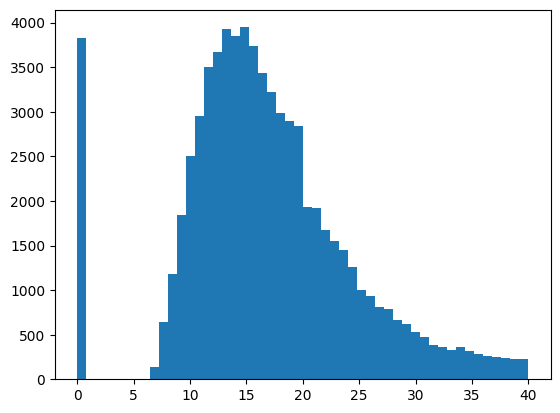

In [131]:
merged['17.5_time_minutes'] = merged['17.5_score'].dt.total_seconds()/60
plt.hist(merged['17.5_time_minutes'], bins = 50)
plt.show()

## Convert columns such as Helen, Fran, Grace etc to time in minutes

In [161]:
def convert_dtype_to_timedelta(x):
    if type(x) == str:
        empty = '00:00:00'
        return empty[:len(empty) - len(x)] + x

    return "00:00:00"

for col in [ 'Fran', 'Grace', 'Helen', 'Filthy 50', 'Sprint 400m','Run 5K']:
    #ignore columns that are already floats
    if merged[col].dtype == 'float':
        continue
    
    col_to_convert = merged[col].copy()
    # replace missing and zeros with 00:00:00
    col_to_convert = col_to_convert.apply(convert_dtype_to_timedelta)
    col_to_convert = pd.to_timedelta(col_to_convert, errors='coerce').dt.total_seconds()/60
    merged[col] = col_to_convert


## Predicting with 17.5 score as target

We will predict the 17.5 score using the Benchmark Stats and some scores as features.

In [153]:
# keep the top 50k competitors, since the rest have several missing workouts

top50k = merged[merged['Overallrank']< 50000]


df = top50k.copy()
print(merged.columns)
df = df[['Age', 'Height', 'Weight',
       'Back Squat', 'Clean & Jerk', 'Snatch', 'Deadlift', 'Fight Gone Bad',
       'Max Pull-ups', 'Fran', 'Grace', 'Helen', 'Filthy 50', 'Sprint 400m',
       'Run 5K', '17.3_reps','17.5_time_minutes']]

df.head()


Index(['Userid', 'Name', 'Affiliate', 'Region', 'Age', 'Height', 'Weight',
       'Back Squat', 'Clean & Jerk', 'Snatch', 'Deadlift', 'Fight Gone Bad',
       'Max Pull-ups', 'Fran', 'Grace', 'Helen', 'Filthy 50', 'Sprint 400m',
       'Run 5K', 'Overallrank', '17.1_rank', '17.1_score', '17.1_percentile',
       '17.2_score', '17.2_percentile', '17.3_rank', '17.3_score',
       '17.3_percentile', '17.4_rank', '17.4_score', '17.4_percentile',
       '17.5_rank', '17.5_score', '17.5_percentile', '17.3_reps',
       '17.5_time_minutes'],
      dtype='object')


,Age,Height,Weight,Back Squat,Clean & Jerk,Snatch,Deadlift,Fight Gone Bad,Max Pull-ups,Fran,Grace,Helen,Filthy 50,Sprint 400m,Run 5K,17.3_reps,17.5_time_minutes
0,34,77,231,335,265,210,415,393,32,3.766667,2.900000,8.266667,21.45,1.066667,22.083333,56,15.333333
4,30,70,180,0,0,0,485,0,52,3.083333,0.000000,0.000000,0.00,0.000000,19.333333,93,10.533333
5,49,70,187,355,255,195,435,0,50,2.433333,2.566667,7.400000,0.00,0.000000,0.000000,80,14.250000
6,33,68,174,325,245,165,415,0,33,3.766667,2.950000,0.000000,0.00,1.083333,19.366667,68,15.450000
7,42,73,190,320,240,175,385,0,0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,80,11.133333


In [154]:
col_to_predict = '17.5_time_minutes'

#drop any rows where the value we want to predict is missing
df = df.dropna(subset = [col_to_predict])
df = df[df[col_to_predict] >= 1] # if the time was less than a minute, this may be a problem

# sanity check, for number of nan values in other columns
for col in df.columns:
    print(col, df[col].isna().sum())
df.fillna(0, inplace = True)


print(f"\ndf shape: {df.shape}")


Age 0
Height 0
Weight 0
Back Squat 0
Clean & Jerk 0
Snatch 0
Deadlift 0
Fight Gone Bad 0
Max Pull-ups 0
Fran 6
Grace 4
Helen 4
Filthy 50 5
Sprint 400m 2
Run 5K 14
17.3_reps 0
17.5_time_minutes 0

df shape: (36412, 17)


<Axes: >

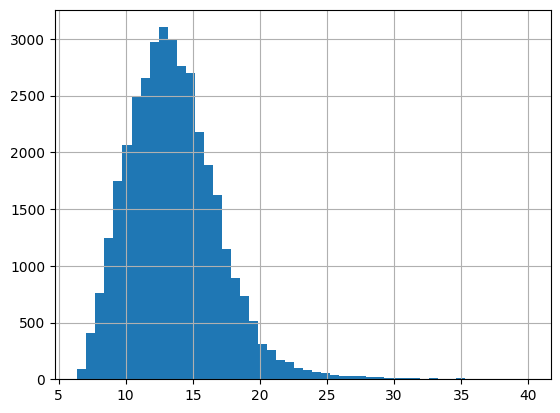

In [155]:
# final sanity check on column being predicted
df[col_to_predict].hist(bins = 50)

In [156]:
# Create a random forest model to predict scores
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
X = df.drop(col_to_predict, axis = 1)
y = df[col_to_predict]

# randomly sample 80% of your data for training and use the other 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

model.fit(X_train, y_train)
print(f"model score: {model.score(X_test, y_test)}")


model score: 0.3451414262291146


In [164]:
preds = model.predict(X_test)

# find absolute error
errors = abs(preds - y_test)
print(f"mean absolute error: {np.mean(errors)}")

# view the predictions
pd.DataFrame({'actual': y_test, 'preds': preds}).head(10)

mean absolute error: 1.9866369842856992


,actual,preds
43128,13.466667,12.442833
173620,16.400000,14.295990
113732,20.850000,16.618808
73373,12.233333,10.434136
11612,11.300000,14.973500
166607,13.150000,12.271556
37200,8.800000,8.237000
68978,18.716667,13.246667
115053,17.750000,16.285667
9368,13.150000,11.197667
